1635
1635


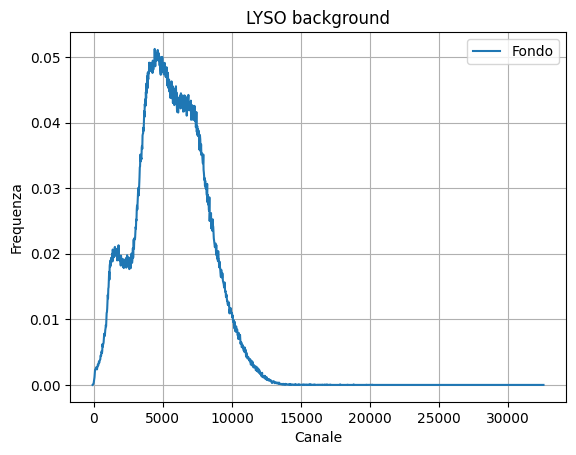

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2


def repeat_fit(ls, left_bound, right_bound, mu, sigma, A, ampiezza_picco_limite, dis=False, limit_ADC=100):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di mu in cui è accettabile avere il picco
    '''
    peak_list = []
    error_peak_list = []
    sigma_list = []
    error_sigma_list = []
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC/2)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC/2) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    return np.array(peak_list), np.array(error_peak_list), np.array(sigma_list), np.array(error_sigma_list)

data = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\LYSO\Fondo LYSO\LYSO-fondo-newgate.CSV', sep=';')
data1 = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\LYSO\Torio\LYSO_torio.csv', sep=' \t', engine='python')

channel_back = np.array(data['Channel']) 
counts_back = np.array(data['Counts'])
time_back = 61638 #s
frequency_back = counts_back/time_back

counts_Th = np.array(data1['Counts'])
channel_Th = np.arange(-90, 10000000, 20)[:len(counts_Th)]
time_Th = 1211 #s
frequency_Th = counts_Th/time_Th

# devo allungare il fondo con tanti zeri
allungo_x = np.arange(channel_back[-1], 100000000, 20)
allungo_y = np.zeros(len(allungo_x))
channel_back = np.concatenate((channel_back, allungo_x))[:len(frequency_Th)]
counts_back = np.concatenate((counts_back, allungo_y))[:len(frequency_Th)]
frequency_back = np.concatenate((frequency_back, allungo_y))[:len(frequency_Th)]

print(len(channel_back))
print(len(frequency_Th))

plt.plot(channel_back, frequency_back, label='Fondo')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('LYSO background')
plt.legend()
plt.grid()
plt.show()

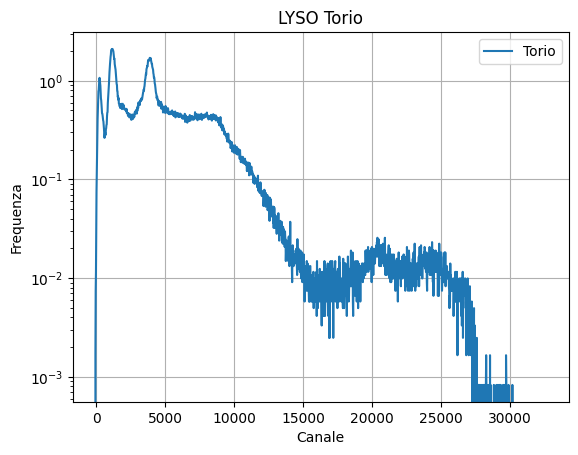

In [2]:
plt.plot(channel_Th, frequency_Th, label='Torio')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('LYSO Torio')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

channel = channel_back
frequency = frequency_Th - frequency_back

for i in range(len(frequency)):
    if frequency[i] < 0:
        frequency[i] = 0

import plotly.express as px
fig = px.line(x=channel, y=frequency, title='Torio')
fig.show()

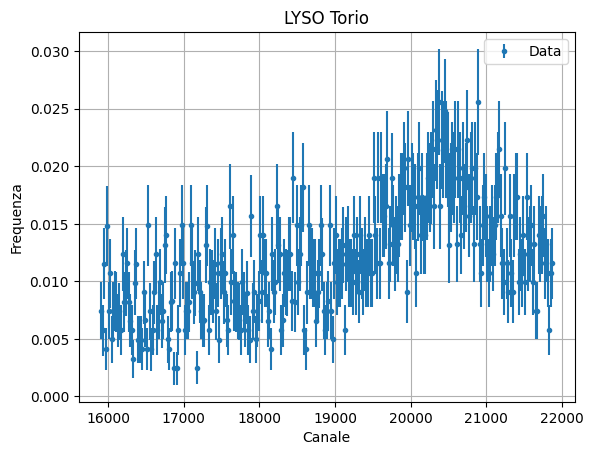

[20433.44630185 20433.44630185 20459.14551875 20459.14551875
 20475.11257893 20475.11257893 20453.31484415 20453.31484415
 20451.17557048 20451.17557048 20455.47647812 20455.47647812
 20481.52452374 20481.52452374 20457.14693542 20457.14693542
 20480.47859581 20480.47859581 20483.71886234 20483.71886234
 20489.37549862 20489.37549862 20489.39034685 20489.39034685
 20492.86204049 20492.86204049 20477.84778863 20477.84778863
 20470.26966175 20470.26966175 20332.12110836 20332.12110836
 20265.86826354 20265.86826354 20434.64996845 20434.64996845
 20449.03525494 20466.56235869 20466.56235869 20459.29073367
 20454.56757519 20453.82722898 20453.82722898 20465.35267806
 20467.66692462 20468.14036556 20468.14036556 20462.97147009
 20468.61554124 20468.61554124 20480.04555666 20493.08346277
 20506.58464979 20506.58464979 20515.93642754 20517.2953538
 20522.12131695 20522.12131695 20457.24017638 20451.05819023
 20432.01801113 20462.88060184 20387.66456811 20387.66456811
 20164.15780245 20292.119

In [3]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

error = np.sqrt(counts_Th/time_Th**2 + counts_back/time_back**2)

plt.errorbar(channel[800:1100], frequency[800:1100], yerr=error[800:1100], fmt='.', label='Data')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('LYSO Torio')
plt.legend()
plt.grid()
plt.show()

ls = LeastSquares(channel, frequency, error, func)

peak_list2104, error_peak_list2104, sigma_list2104, err_sigma_list2104 = repeat_fit(ls, 19500, 21500, 20450, 600, 0.025, 600, dis=False)

print(peak_list2104)
print(error_peak_list2104)
print(sigma_list2104)
print(err_sigma_list2104)

In [4]:
def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = np.sqrt((abs(np.max(values) - np.min(values))/2)**2 + (1/np.sum(1/(errors**2))))
    return mean, error_mean

mean, error_mean = weighted_mean(peak_list2104, error_peak_list2104)
print(mean, error_mean)

sigma_mean, error_sigma_mean = weighted_mean(sigma_list2104, err_sigma_list2104)
print(sigma_mean, error_sigma_mean)

20471.085272822635 285.515653071855
763.4127995106787 434.07051836710406


In [5]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

peak_list300, error_peak_list300, sigma_list300, err_sigma_list300 = repeat_fit(ls, 3350, 4370, 3870, 400, 1.8, 300, dis=False)

print(peak_list300)
print(error_peak_list300)

mean, error_mean = weighted_mean(peak_list300, error_peak_list300)
print(mean, error_mean)

sigma_mean, error_sigma_mean = weighted_mean(sigma_list300, err_sigma_list300)
print(sigma_mean, error_sigma_mean)

[3867.98590777 3867.98590777 3868.67478501 3868.67478501 3868.19122123
 3868.19122123 3867.94840287 3867.94840287 3867.58453719 3867.58453719
 3866.07480696 3866.07480696 3866.62751001 3866.62751001 3867.44094607
 3867.44094607 3865.82201721 3865.82201721 3896.09066113 3896.09066113
 3870.64341006 3870.64341006 3869.17550749 3869.17550749 3869.85342927
 3869.85342927 3870.12670991 3870.12670991 3870.19966115 3870.19966115
 3870.08897934 3870.08897934 3869.88528695 3869.88528695 3870.70323574
 3870.70323574 3869.20151237 3869.20151237 3870.25650167 3870.25650167
 3862.25669253 3862.25669253 3870.74076473 3870.74076473 3857.03258077
 3857.03258077 3783.95913407 3783.95913407 3865.90126823 3865.90126823
 3866.05786242 3866.05786242 3865.81500131 3865.81500131 3864.49956376
 3864.49956376 3865.59972575 3865.59972575 3872.54227753 3872.54227753
 3880.06422349 3880.06422349 3884.20993874 3884.20993874 3889.34544299
 3889.34544299 3871.92469963 3871.92469963 3840.93922824 3840.93922824
 3856.